In [4]:
#Imports
import tensorflow as tf
import os
import numpy as np
import shutil
import zipfile
import matplotlib.pyplot as plt

In [5]:
#Imports for TensorFlow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers


**RUN THE CELL BELOW ONLY ONCE, IT IS RESPONSIBLE FOR EXTRACTING THE DATASET**
**BY USING THIS CELL YOU ARE CREATING YOUR OWN UNIQUE DATASET AS EACH TRAINING, TESTING, AND VALIDATION DATA ARE SHUFFLED**

In [6]:
# Define the directories
base_dir = os.getcwd()
dataset_dir = os.path.join(base_dir, 'Dataset')
dataset_split_dir = os.path.join(base_dir, 'dataset_split')
zip_file = os.path.join(base_dir, 'Dataset.zip')

# Extract the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(base_dir)

# Create the split directories if they don't exist
os.makedirs(dataset_split_dir, exist_ok=True)
train_dir = os.path.join(dataset_split_dir, 'train')
valid_dir = os.path.join(dataset_split_dir, 'valid')
test_dir = os.path.join(dataset_split_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get the list of all classes
classes = os.listdir(dataset_dir)

# For each class, split the files into train/valid/test
for class_name in classes:
    # Create directories for this class in train/valid/test
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(valid_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

    # Get a list of all files for this class
    files = os.listdir(os.path.join(dataset_dir, class_name))
    # Shuffle the files
    np.random.shuffle(files)

    # Split the files
    train_files = files[:int(len(files)*0.8)]
    valid_files = files[int(len(files)*0.8):int(len(files)*0.95)]
    test_files = files[int(len(files)*0.95):]

    # Copy the files to the right directories
    for file in train_files:
        shutil.copy(os.path.join(dataset_dir, class_name, file), os.path.join(train_dir, class_name, file))
    for file in valid_files:
        shutil.copy(os.path.join(dataset_dir, class_name, file), os.path.join(valid_dir, class_name, file))
    for file in test_files:
        shutil.copy(os.path.join(dataset_dir, class_name, file), os.path.join(test_dir, class_name, file))

**RUN THE CELL BELOW TO USE THE DATASET USED TO TRAIN THE MODEL**

In [10]:
zip_file = os.path.join(base_dir, 'dataset_split.zip')

# Extract the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(base_dir)

**ONLY RUN THIS CELL ONCE THE ABOVE CELL HAS RAN ONCE**

In [11]:
base_dir = os.getcwd() #Defining the base directory
dataset_split_dir = os.path.join(base_dir, 'dataset_split')
train_dir = os.path.join(dataset_split_dir, 'train')
valid_dir = os.path.join(dataset_split_dir, 'valid')
test_dir = os.path.join(dataset_split_dir, 'test')

In [12]:
#Train, Validation and test Data
img_height, img_width = 64, 64
batch_size = 100
Train = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
Valid = ImageDataGenerator( rescale = 1.0/255. )
Test = ImageDataGenerator( rescale = 1.0/255. )
train_data = Train.flow_from_directory(train_dir, 
                                         target_size = (img_height, img_width), 
                                         batch_size = batch_size,
                                         class_mode = 'categorical'
                                         )
valid_data = Valid.flow_from_directory(valid_dir,
                                        target_size = (img_height, img_width),
                                        batch_size = batch_size,
                                        class_mode = 'categorical'
                                        )
test_data = Test.flow_from_directory(test_dir, 
                                            target_size = (img_height, img_width),
                                            batch_size = batch_size,
                                            class_mode = 'categorical'
                                            )

Found 3200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


**THE CELL ABOVE SHOULD INDICATE 3200 IMAGES THEN 600 IMAGES, THEN 200 IMAGES ALL BELONGING TO 4 CLASSESS**

In [55]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      #Dropout(0.5, seed=123),
      tf.keras.layers.Dense(512, activation='relu'),
      #Dropout(0.6, seed=123),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [142]:

model.compile(optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [143]:
history = model.fit(
    train_data,
    validation_data = valid_data,
    epochs = 30 #15
)

Epoch 1/30
32/32 [==============================] - 21s 586ms/step - loss: 1.7988 - accuracy: 0.4766 - val_loss: 0.7130 - val_accuracy: 0.7383
Epoch 2/30
32/32 [==============================] - 18s 568ms/step - loss: 0.7104 - accuracy: 0.7334 - val_loss: 0.5544 - val_accuracy: 0.7950
Epoch 3/30
32/32 [==============================] - 18s 568ms/step - loss: 0.5979 - accuracy: 0.7691 - val_loss: 0.5218 - val_accuracy: 0.7917
Epoch 4/30
32/32 [==============================] - 18s 560ms/step - loss: 0.5037 - accuracy: 0.8087 - val_loss: 0.3606 - val_accuracy: 0.8750
Epoch 5/30
32/32 [==============================] - 18s 567ms/step - loss: 0.4412 - accuracy: 0.8397 - val_loss: 0.3197 - val_accuracy: 0.8817
Epoch 6/30
32/32 [==============================] - 18s 561ms/step - loss: 0.4147 - accuracy: 0.8450 - val_loss: 0.3668 - val_accuracy: 0.8633
Epoch 7/30
32/32 [==============================] - 18s 573ms/step - loss: 0.3898 - accuracy: 0.8591 - val_loss: 0.3413 - val_accuracy: 0.8883

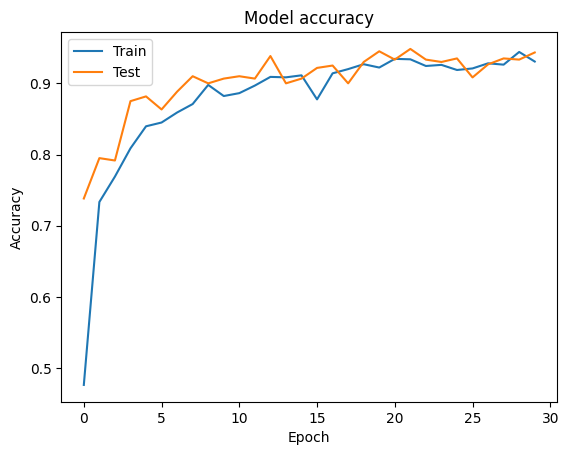

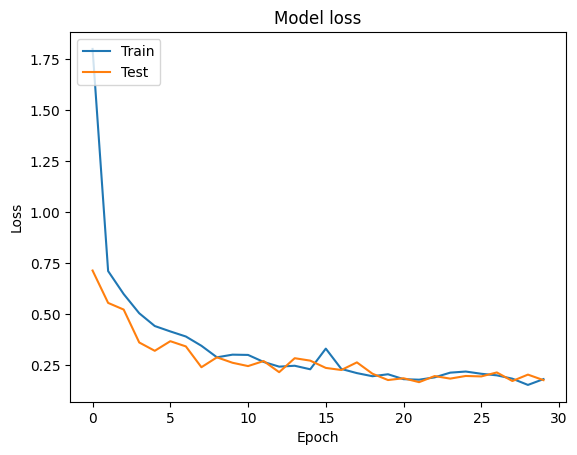

In [144]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [145]:
model.evaluate(test_data)


2/2 [==============================] - 1s 136ms/step - loss: 0.2250 - accuracy: 0.9350


[0.224978506565094, 0.9350000023841858]

**THE CELL BELOW IS FOR SAVING THE MODEL**

In [10]:
model.save('FruitClassifier_64x64_NoDropout_30Epochs_Train96%_Val9533%_Test9650%(1).h5')

**ONLY RUN THE CELL BELOW WHEN TESTING IN PC, THIS WOULD NTO WORK IN GOOGLE COLLAB**

In [146]:
#Testing the model

Classes = ['Apple', 'Banana', 'Lemon', 'Orange']

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import tkinter as tk
from tkinter import filedialog

def test_model(model):
    root = tk.Tk()
    root.withdraw()
    image_path = filedialog.askopenfilename()

    # Load the image
    img = load_img(image_path, target_size=(64, 64))

    # Convert the image to a numpy array
    img_array = img_to_array(img)

    # Add an extra dimension to the array
    img_array_expanded = np.expand_dims(img_array, axis=0)

    # Normalize the data
    img_array_expanded /= 255.

    # Use the model to make a prediction
    prediction = model.predict(img_array_expanded)

     # Print the prediction
    print(prediction)

    # Get the class with the highest probability
    predicted_class = np.argmax(prediction)

    confidence_level = np.max(prediction)


    return predicted_class, confidence_level

model = tf.keras.models.load_model('FruitClassifier_64x64_Dropout_30Epochs_Train9519%_Val9483%_Test9500%(1).h5')
predicted_class, confidence_level = test_model(model)
print(predicted_class, confidence_level)
print("Prediction: ", Classes[predicted_class])
print("Confidence level: ", confidence_level*100, "%")

1/1 [==============================] - 0s 91ms/step
[[7.43495048e-06 1.21378265e-01 4.64634866e-01 4.13979441e-01]]
2 0.46463487
Prediction:  Lemon
Confidence level:  46.463486552238464 %


**RUN THE CELL BELOW WHEN CONVERTING .H5 FILE TO TFLITE FILE**

In [4]:


model = tf.keras.models.load_model('FruitClassifier_64x64_NoDropout_30Epochs_Train96%_Val9533%_Test9650%(1).h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("FruitClassifier_64x64_NoDropout_30Epochs_Train96%_Val9533%_Test9650%(1).tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\REMBRA~1\AppData\Local\Temp\tmp2nvy5ltt\assets


INFO:tensorflow:Assets written to: C:\Users\REMBRA~1\AppData\Local\Temp\tmp2nvy5ltt\assets


2026940